<a href="https://colab.research.google.com/github/Hktips/GEN_AI_Projects/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(f"x_train shape:{x_train.shape}")
print(f"x_test shape:{x_test.shape}")

x_train shape:(60000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1)


In [13]:
encoder=models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                           layers.Conv2D(32,(3,3),activation='relu',padding='same',strides=2),#32,(3,3) 32 is a filter and (3,3) are kernal size.
                           layers.Conv2D(64,(3,3),activation='relu',padding='same',strides=2),
                           layers.Flatten(),
                           layers.Dense(64,activation='relu')

                        ])
decoder=models.Sequential([layers.InputLayer(input_shape=(64,)),
                          layers.Dense(7*7*64,activation='relu'),
                          layers.Reshape((7,7,64)),
                          layers.Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same'),
                          layers.Conv2DTranspose(32,(3,3),strides=2,activation='relu',padding='same'),
                          layers.Conv2DTranspose(1,(3,3),activation='sigmoid',padding='same')
                          ])
autoencoder=models.Sequential([encoder,decoder])
#autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
autoencoder.fit(x_train,x_train, epochs=5,batch_size=128, validation_data=(x_test,x_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 224ms/step - loss: 0.2551 - val_loss: 0.0878
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 219ms/step - loss: 0.0850 - val_loss: 0.0773
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 207ms/step - loss: 0.0766 - val_loss: 0.0729
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 211ms/step - loss: 0.0730 - val_loss: 0.0709
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 217ms/step - loss: 0.0712 - val_loss: 0.0697


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step


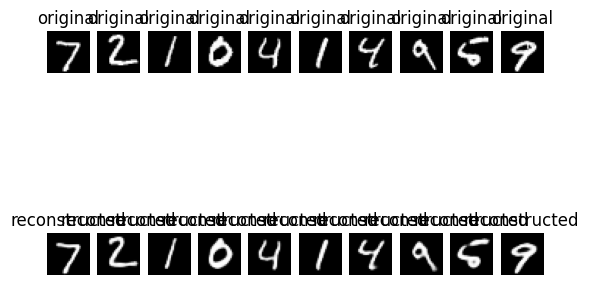

In [21]:
decoded_images=autoencoder.predict(x_test)
n=10
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  plt.title("original")
  plt.axis("off")

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_images[i].reshape(28,28),cmap="gray")
  plt.title("reconstructed")
  plt.axis("off")
plt.show()